# **Unsupervised Learning - Categorising Countries on Basis of Socio-economic Factors**

**About organization**:

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

**Problem Statement**:

HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to **choose the countries** that are in the **direst need of aid**. Hence, your Job as a Data scientist is to **categorise the countries** using some **socio-economic and health factors** that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

**Aim**:

To create groups of countries based on their socio-economic factors to help in deciding on the recipents of the financial aid.

## **Description of the features**:

* **country** : Name of the country
* **child_mort** : Death of children under 5 years of age per 1000 live births
*   **exports** : Exports of goods and services per capita. Given as %age of the GDP per capita
*   **health** : Total health spending per capita. Given as %age of GDP per capita
*   **imports** : Imports of goods and services per capita. Given as %age of the GDP per capita
*   **Income** : Net income per person
*   **Inflation** : The measurement of the annual growth rate of the Total GDP
*   **life_expec** : The average number of years a new born child would live if the current mortality patterns are to remain the same.
*   **total_fer** : The number of children that would be born to each woman if the current age-fertility rates remain the same.
*   **gdpp** : The GDP per capita. Calculated as the Total GDP divided by the total population.















In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import warnings
warnings.filterwarnings('ignore')

# **Gathering the data**

Source: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data 

In [2]:
country_data = pd.read_csv("Country-data.csv")
data_descrip = pd.read_csv("data-dictionary+.csv")

In [3]:
display(country_data.head())

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
print(data_descrip)

  Column Name                                        Description
0     country                                Name of the country
1  child_mort  Death of children under 5 years of age per 100...
2     exports  Exports of goods and services per capita. Give...
3      health  Total health spending per capita. Given as %ag...
4     imports  Imports of goods and services per capita. Give...
5      Income                              Net income per person
6   Inflation  The measurement of the annual growth rate of t...
7  life_expec  The average number of years a new born child w...
8   total_fer  The number of children that would be born to e...
9        gdpp  The GDP per capita. Calculated as the Total GD...


# **Data Exploration**

In [5]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
country_data.isnull().any()

country       False
child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool

* There are no null values in the data.

In [8]:
country_data.duplicated().sum()

0

- There are now duplicate rows.

## **Plotting the correlation between each numerical feature**

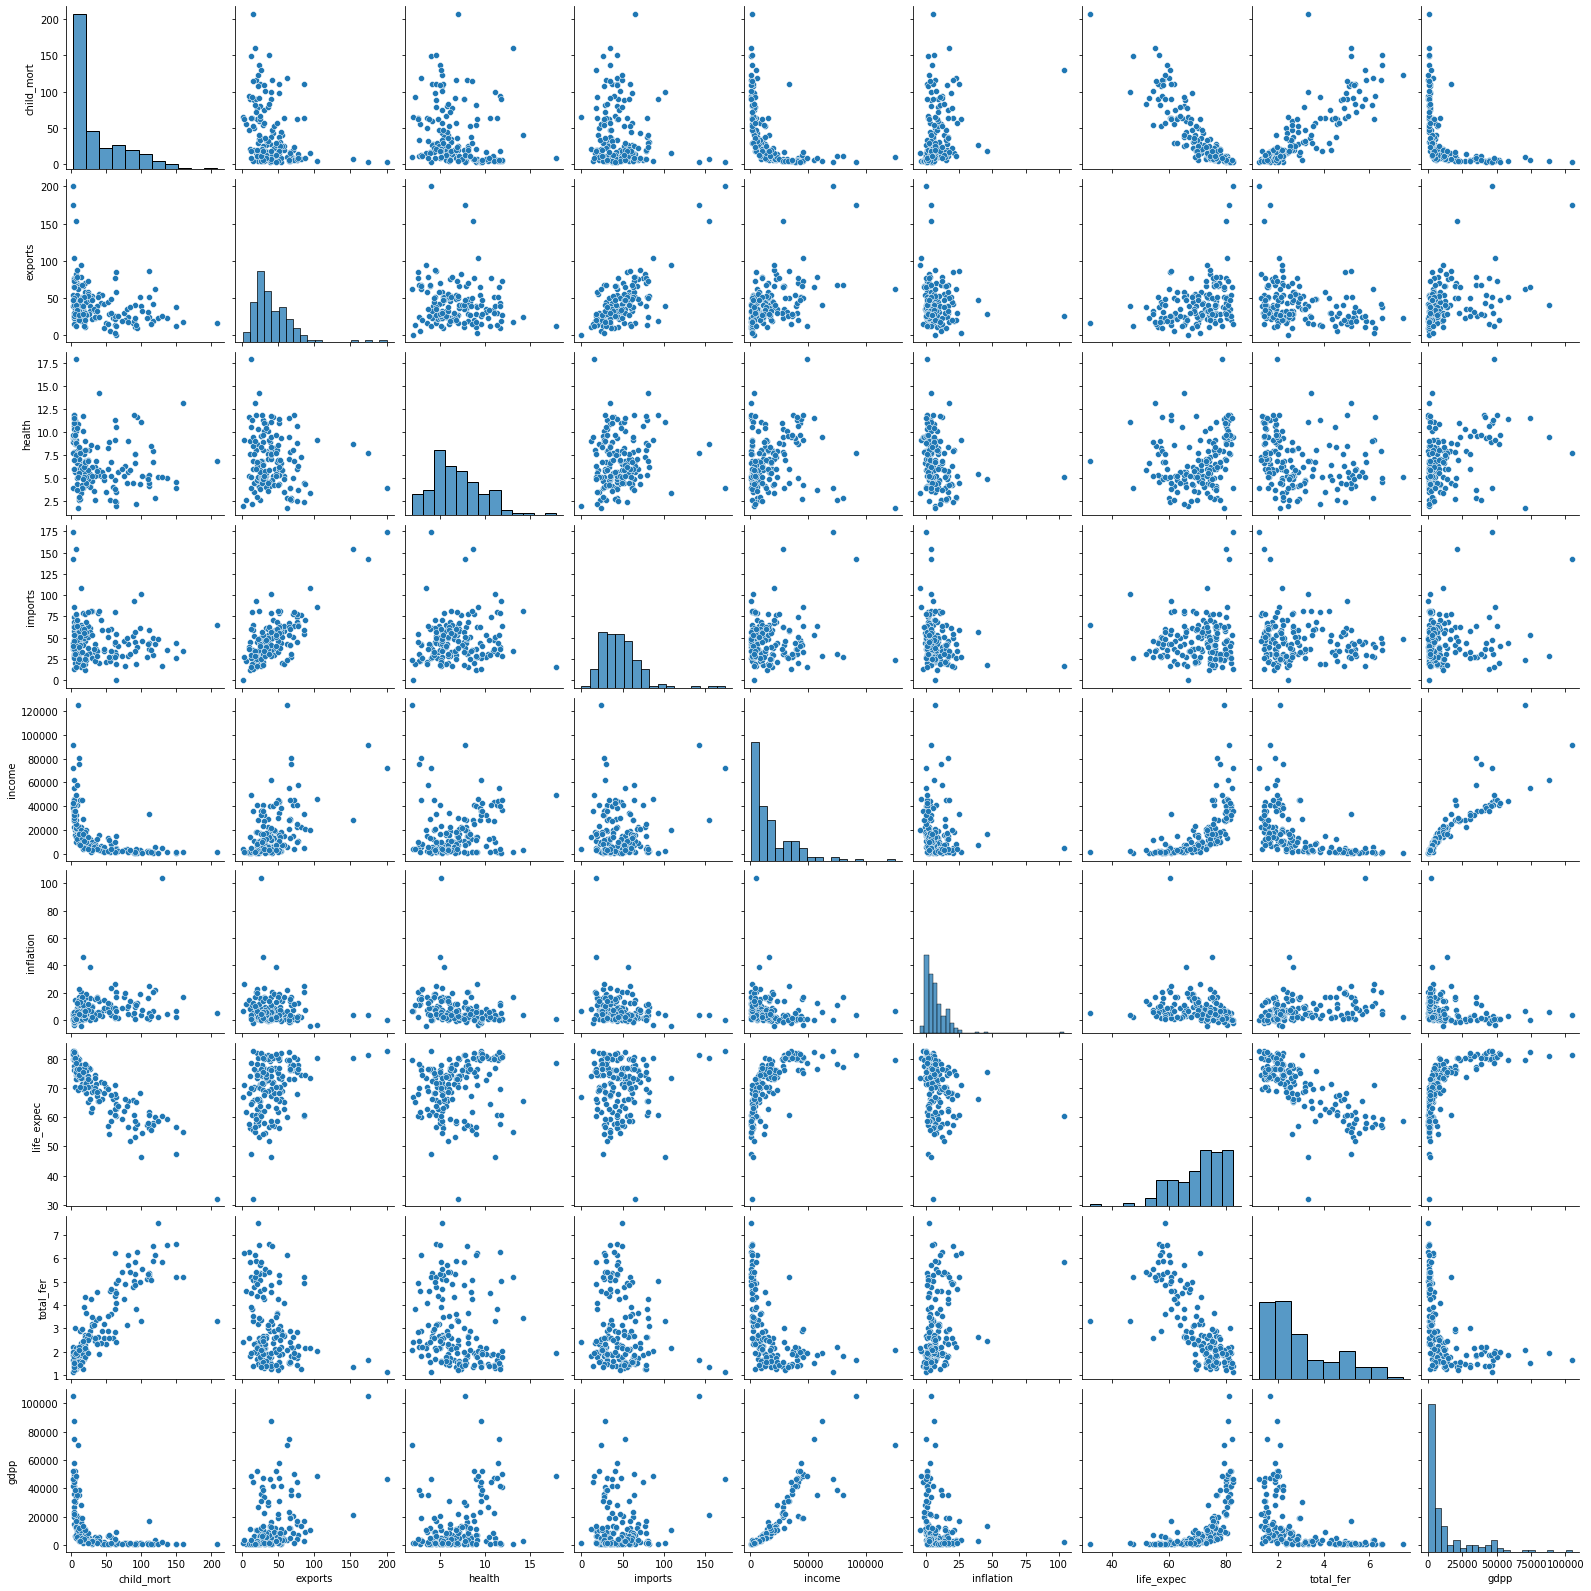

In [9]:
sns.pairplot(country_data)
plt.show()

# **Exploratory Data Analysis**




In [10]:
cols = list(country_data.columns)
cols

['country',
 'child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [11]:
numerical_cols = cols[1:]
categorical_cols = ['country']

In [12]:
print(numerical_cols)

['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']




*   For all features except 'total_fer', we can find outliers in the distributions.
*   **Outliers** significantly impact the clustering algorithm and hence they need to be suppressed.



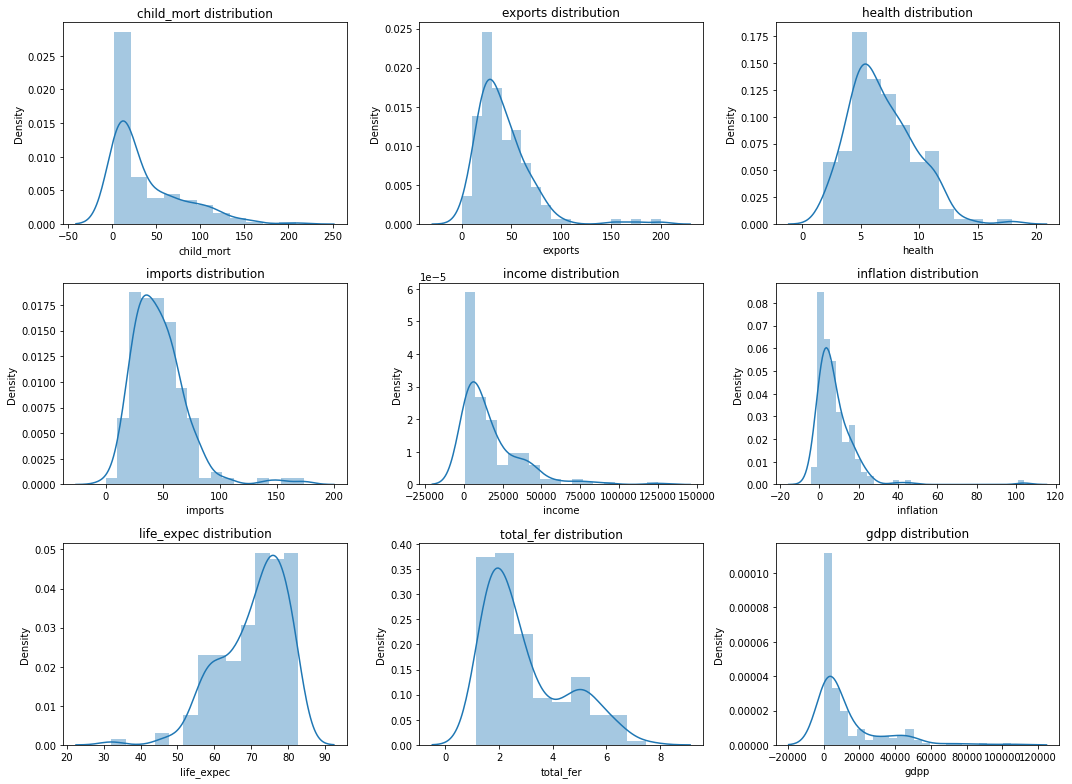

In [13]:
# distplot
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15,11))
for i in range(len(numerical_cols)):
  plt.subplot(3,3,i+1)
  sns.distplot(country_data[numerical_cols[i]])
  title = numerical_cols[i] + ' distribution'
  plt.title(title)
plt.tight_layout()
plt.show()

Key takeaways:

- Life expectancy distribution is negatively skewed.
- Health expenditure has an approximate normal distribution.
- All distributions except Life Expectancy show close to positive skewness.

# **Visualizing the important variables**

## GDP per capita

In [14]:
# Categories for visualization
catog = ['High', 'Medium', 'Low']

In [15]:
# Function to plot each feature vs country for the three categories - High, Medium and Low
def plots_catogs(feature, ttl_text, subplt_ttl):
  fig, ax = plt.subplots(1,3,figsize = (17,5))
  sns.barplot(x = 'country', y = feature, data = country_data.sort_values(by = feature, ascending = False).iloc[:5], ax = ax[0])
  sns.barplot(x = 'country', y = feature, data = country_data.sort_values(by = feature, ascending = False).iloc[81:86], ax = ax[1])
  sns.barplot(x = 'country', y = feature, data = country_data.sort_values(by = feature, ascending = False).iloc[-5:], ax = ax[2])
  for i in range(3):
    title = catog[i] + ' ' + subplt_ttl
    ax[i].set_title(title)
    ax[i].tick_params(axis='x', labelrotation = 45)
  fig.suptitle(ttl_text, fontsize = 18)

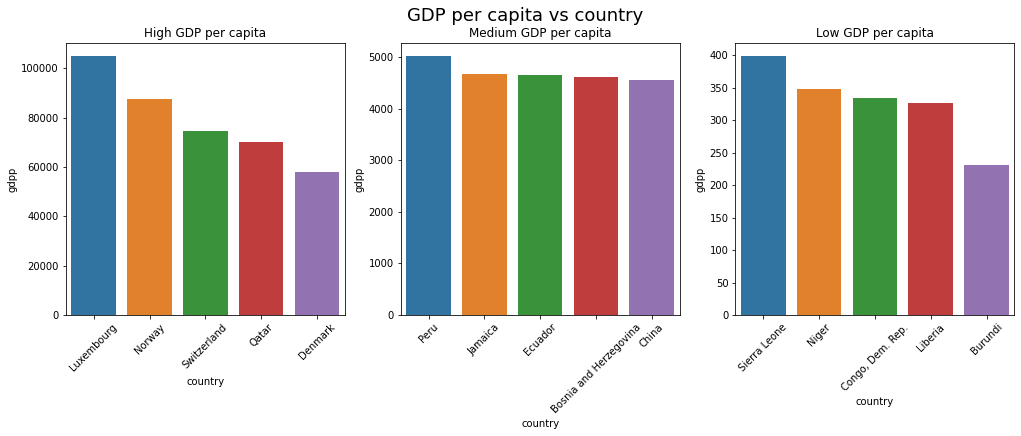

In [16]:
title = 'GDP per capita vs country'
plots_catogs('gdpp', title, 'GDP per capita')
plt.show()

- **GDP per capita** is a **measure** of the **standard of living, prosperity and overall well-being in a country**. Low GDP per capita means that the country is unable to supply the country's population with basic goods and services.
- GDP growth also depends on the population of the country.
- **Luxembourg** **leads** in GDP per capita and **4 out of 5 countries** come from **Europe** which lie at the top end. **Qatar** is the **only country** from **Asia/Middle East** occupying this list.
- **African countries** lie at the **bottom end** for GDP per capita. This gives an idea of poor economic conditions with a weak GDP.




## Income - net income per person

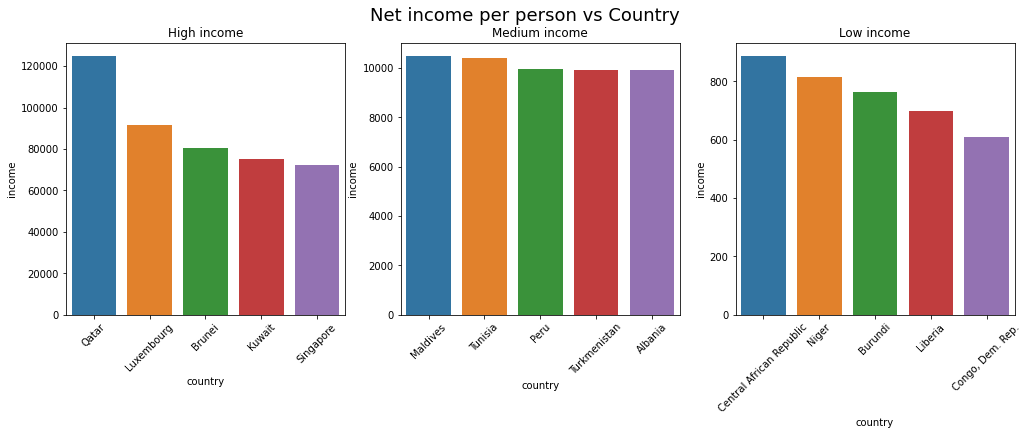

In [17]:
title = 'Net income per person vs Country'
plots_catogs('income', title, 'income')
plt.show()

- **3 out of 5 countries** are from **Asia/Middle East** with **Qatar** **leading** the way at **USD120000 net income earned per person**. In addition, **Singapore** and Luxembourg also occupy this list.
- **Majority** of the countries in the **bottom 5** are from **Africa**. The reasons for this could be **due to poor employment conditions** and their **weaker economies**. Moreover, African nations lie in the bottom list for GDP per capita.
- In the High, Medium and Low categories, the **range of the values** show **large variations**.

## Health expenditure

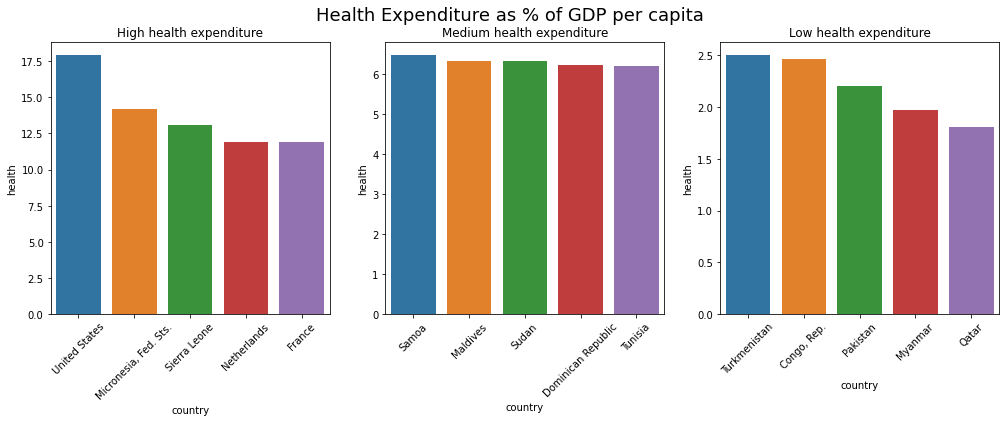

In [18]:
title = 'Health Expenditure as % of GDP per capita'
plots_catogs('health', title, 'health expenditure')
plt.show()

- The expenditure on healthcare by countries are a key factor in economic growth. **Proper healthcare system and services**, leads to a **healthy human capital** and hence **higher income per person**.
- **3 out of 5 countries** in the **bottom** for expenditure in healthcare are in **Asia/Middle East**. 
- **Qatar** is at the **bottom** for **spending in healthcare**. On the other hand, it is the **leading country** in **net income** earned per person.
- **United States** is the **leading country** with regards to **spending in healthcare**, which is around **18%** of its GDP.


## Life Expectancy

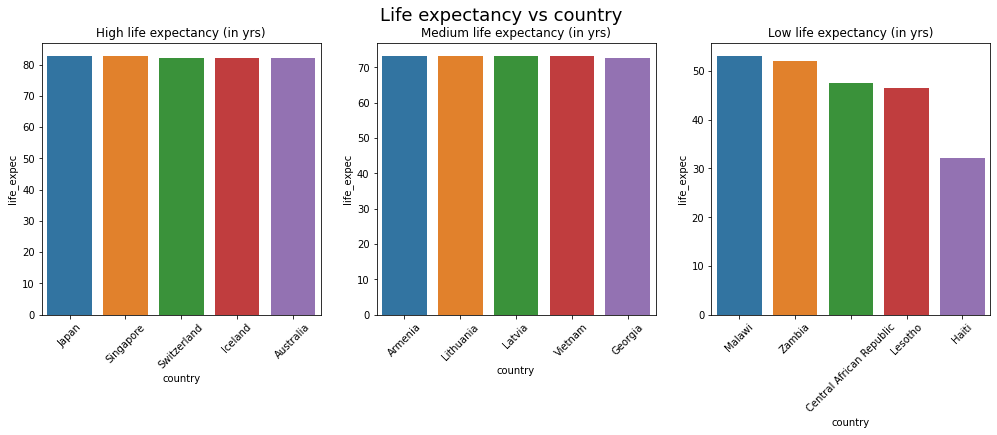

In [19]:
title = 'Life expectancy vs country'
plots_catogs('life_expec', title, 'life expectancy (in yrs)')
plt.show()

- Life expectancy has a correlation with economic growth in a country. **Higher life expectancy** has **causation** with **greater standards of living** and **proper healthcare infrastructure** in the country.
- **Higher life expectancies** are found in **countries in Asia and Europe**, with Japan and Singapore few of them. People in wealthier countries can afford proper living standards which acts as a factor in greater Life Expectancy.
- In the **bottom 5 countries**, **all of them** are in **Africa**, with Haiti being an exception. 
- **Haiti** has a **life expectancy** as low as **30yrs**.

## Child mortality rate

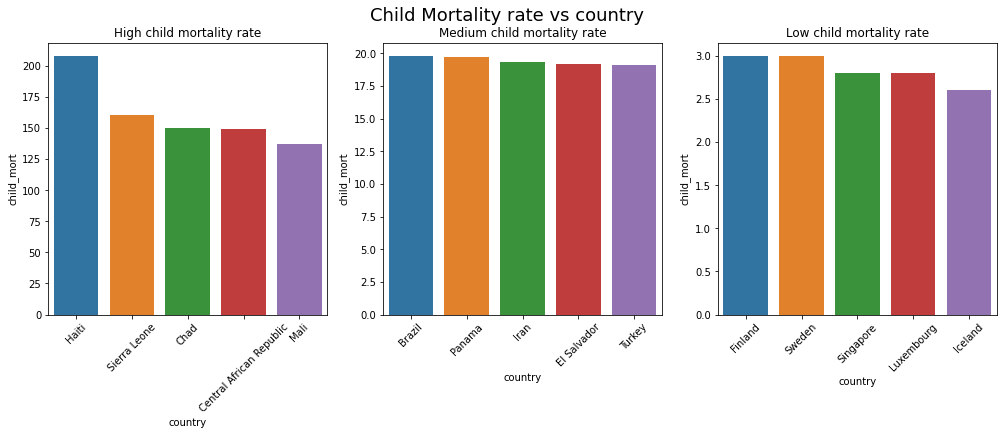

In [20]:
title = 'Child Mortality rate vs country'
plots_catogs('child_mort', title, 'child mortality rate')
plt.show()

- **Child mortality rate** indicate the **state of the country's healthcare system** and the **government schemes** employed for **child health and welfare**. Greater expenditure in healthcare, leads to better conditions and facilities and hence lowers the child mortality rate.
- All countries except **Haiti** in the **top 5** for child mortality are from **Africa**. This clearly outlines the poor condition of the healthcare system for children in the countries. In addition, Africa also lies in the bottom for Life Expectancy as per previous plot.
- **Haiti** has the highest child mortality rate and as per the previous plot, it also has the lowest Life Expectancy among all countries.
- **Singapore** and **other European countries** like **Luxembourg** etc. lie in the **lower extremes in child mortality**.

## Exports of goods and services as % of GDP per capita

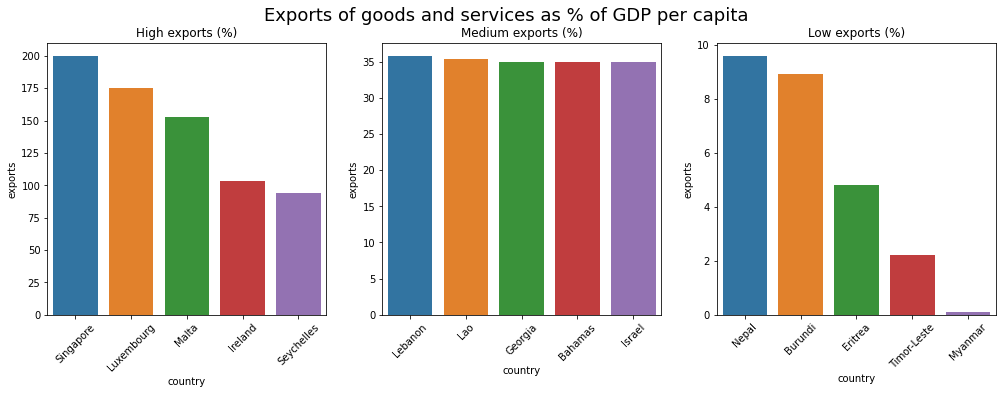

In [21]:
title = 'Exports of goods and services as % of GDP per capita'
plots_catogs('exports', title, 'exports (%)')
plt.show()

- **Higher amount of exports** from a country **positively impact** the **economic growth**. There is a **trade surplus** and **more industrial output** in the domestic sector, which can imply more employment for the people.
- Amount of exports and import trades carried out by a country depend on the geographical location, availability of resources and the various other factors.
- **Singapore**, **Malta** and **Luxembourg** are in the **top 3** for the **Exports** of goods and services.
- Countries having low exports earn less revenue and have less foreign exchange reserves.
- **Myanmar** is at the **bottom** with a meagre **0.1% of its GDP** comprising of exports of its goods and services.
- **Nepal** is in the **bottom 5** for exports of its goods and services. The reason could be the landlocked geography of Nepal, which limits its trades with other countries.


## Imports of goods and services as % of GDP per capita

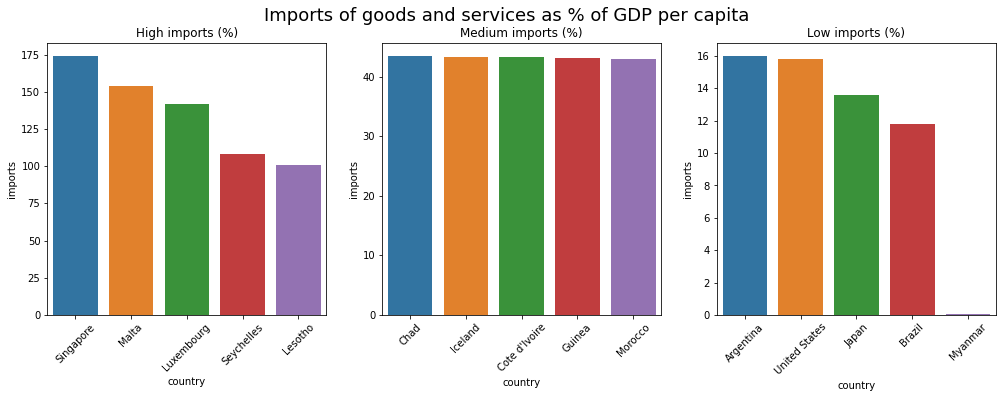

In [22]:
title = 'Imports of goods and services as % of GDP per capita'
plots_catogs('imports', title, 'imports (%)')
plt.show()

- **Increase in imports of goods** relate to **greater domestic demand**. If imports exceed the exports, then there is a trade-deficit.
- **Singapore** has the **highest imports** as % its GDP, with it being closely **followed by Malta** and **Luzembourg**.
- Countries like **United States** and **Japan**, being one of the world's largest economies, are in the **bottom 5** for imports of goods and services.
- **Myanmar** is the one country which has **lowest export and import %** of its GDP per capita. This can be **attributed to poor economic growth**.

## Total fertility rate

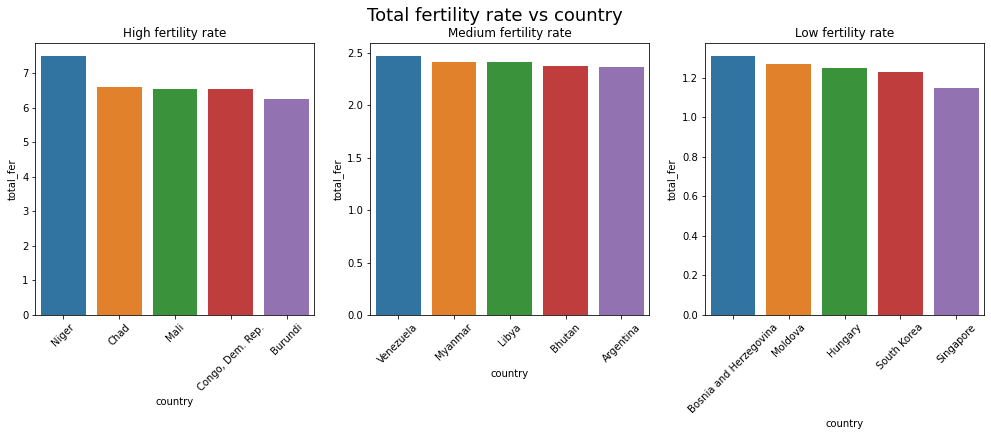

In [23]:
title = 'Total fertility rate vs country'
plots_catogs('total_fer', title, 'fertility rate')
plt.show()

- Population growth in a country is strongly influenced by the fertility rate.
- All the countries with High Fertility Rate come from **Africa**.
- At the other extreme, **Singapore** has the lowest rate around 1.2. It is accompanied by South Korea and certain European countries.

## Inflation

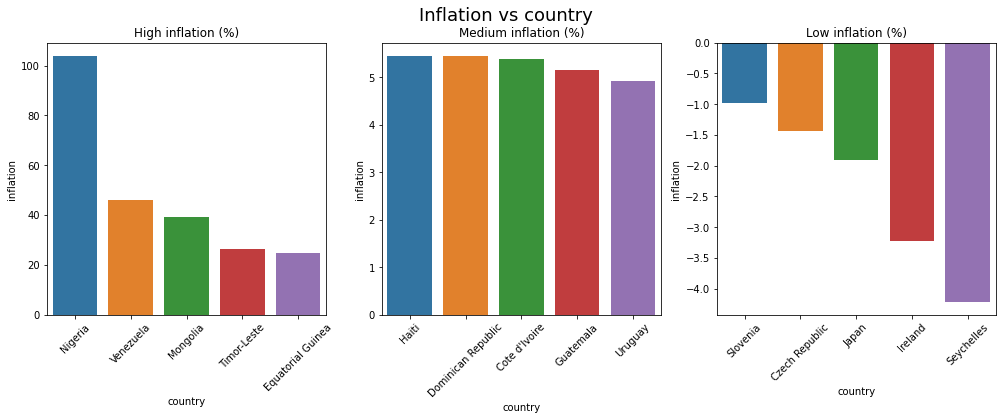

In [24]:
title = 'Inflation vs country'
plots_catogs('inflation', title, 'inflation (%)')
plt.show()

- Inflation gives a broad measure of the rise in prices of goods and services. When inflation increases, the purchasing power of consumers drops and hence GDP consequently decreases.
- On the other hand, negative values for the same indicate a case of '**Deflation**'. In this scenario, consumers do not show urgency in making purchases, hence is no economic activity occurring. This implies less revenue for producers and low economic growth.
- **Nigeria** has the highest inflation rate of more than double then the next country Venezuela.
- Interesting to note is that **Japan** alongwith certain European countries, show deflation in their economic growth. **Seychelles** howers around -4% deflation.

# **EDA Summary**

- **Singapore, Malta and Luxembourg** are in the **top 5** countries for **Imports and Exports** of goods and services. Singapore, specifically shows a trade surplus as noted from the data.
- **Majority of countries** having **high child mortality and fertility rates** come from **Africa**.
- In addition, **Singapore** lies in the **bottom** for **child mortality** and **fertility**, which could indicate better healthcare infrastructure and government policies.
- In **healthcare spending**, **United States** leads with **18%** of its GDP set aside for the same. On the other hand, **countries** in **Asia/Middle East** have spent only a **maximum of 2.5% of their GDP** towards **healthcare**.
- **European** and **Asian countries** like Japan and Singapore are in the **top 5** for **life expectancy**, with it being approximately 80yrs. However, **African countries** and **Haiti** are at the **bottom extreme**.
- In **GDP per capita** growth rates, **majority** of the **countries** at the **top** end are in **Europe** with **Luxembourg leading at USD120000**. **Qatar** is **only Asian country** in this list.
- For **net income earned per person**, **majority** of **countries** come from **Middle East**, with Qatar at the top. At the **other extreme**, **African nations occupy** with a person **earning USD700 on average approximately**. 

## **What factors decide which country is in need of financial aid?**

Countries which are economically backward require a financial aid to help them in getting to a normal level of economic growth. Below are the factors which define an economically backward country.
- **Per capita income is lower** in comparison to developed countries
- **High birth** and **death rates**
- **Lack of expenditure in healthcare** than developed nations leading to poorer health infrastructure and standards of living
- **Rapid growth in population** causing a problem when making resources available to every citizen of the country
- **Unemployment** prevails in these countries due to the lack of viable resources.
- Due to **low wealth**, they experience a drop in their capital
- The **distribution of wealth** and **income is unequal**.

## **Correlation matrix for the features**

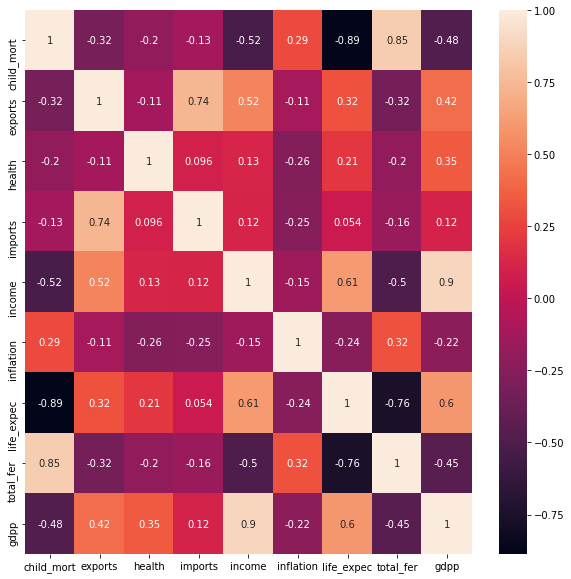

In [25]:
corr = country_data.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot = True)
plt.show()

- Fertility rate and child mortality show 85% of positive correlation, which agrees with the theory. In addition, Life Expectancy has a strong negative correlation with child mortality.
-  Imports and Exports have a 74% positive correlation in this data.

# **Managing outliers**

Outliers have significant effect on the performance of KMeans Clustering.

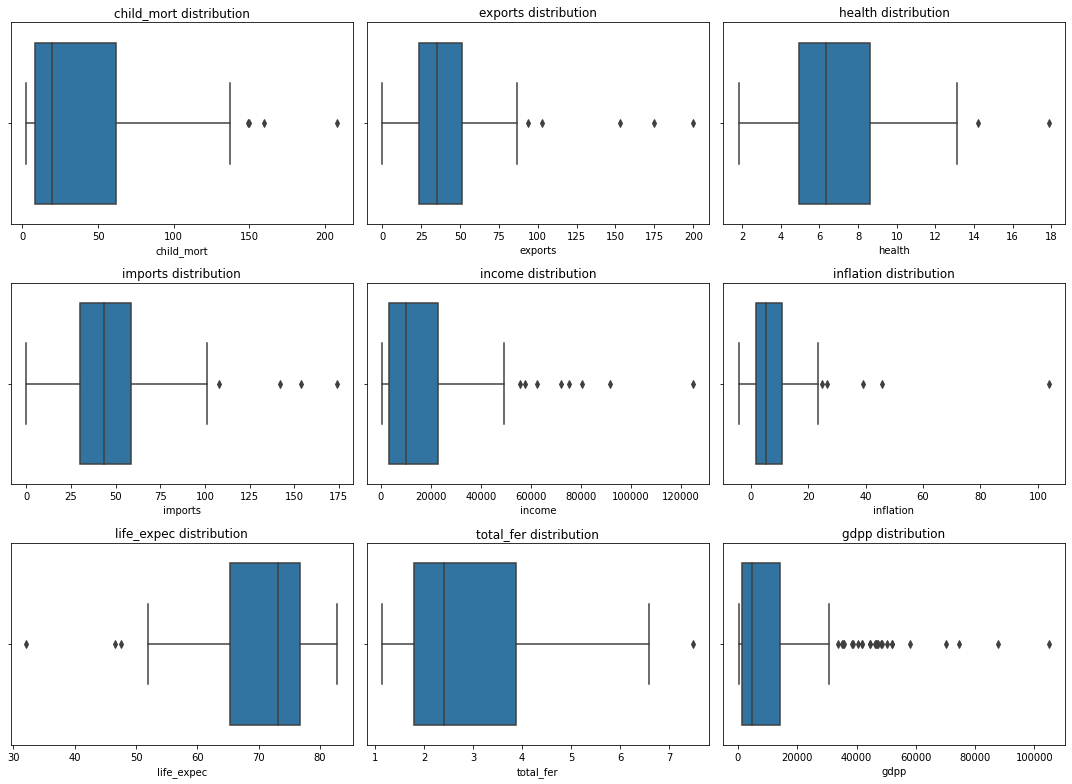

In [26]:
# boxplots
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15,11))
for i in range(len(numerical_cols)):
  plt.subplot(3,3,i+1)
  sns.boxplot(country_data[numerical_cols[i]])
  title = numerical_cols[i] + ' distribution'
  plt.title(title)
plt.tight_layout()
plt.show()

- The distribution of GDP per capita show significant outliers above USD30000. This means there quite a few countries with GDP per capita higher than the normal average.
- There are 25 countries exceeding the 99th percentile value for gdpp.
- Income, Inflation, Imports and Exports also show few outliers which will need to be suppressed.

In [27]:
data_copy = country_data.copy()

### Suppressing outliers using the 'gdpp' column

In [28]:
# Suppressing the outliers
indexes = np.where(country_data['gdpp']>32000)
print('Number of outliers for gdpp = ', len(indexes[0]))
# display(country_data.iloc[indexes[0],:].sort_values('gdpp', ascending = True))

Number of outliers for gdpp =  25


In [29]:
# Dropping the rows containing outliers in 'gdpp'
country_data.drop(indexes[0], axis = 0, inplace = True)
country_data.shape

(142, 10)

# **Scaling the data**

In [30]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,142.000000,142.000000,142.000000,142.000000,142.00000,142.000000,142.000000,142.000000,142.000000
mean,44.112676,37.970415,6.424014,46.598351,10935.65493,8.599683,68.806338,3.149014,6340.943662
std,41.038923,21.839432,2.369044,21.142601,9895.15270,11.112812,8.490539,1.553241,7110.006849
min,3.200000,0.109000,1.970000,0.065900,609.00000,-4.210000,32.100000,1.230000,231.000000
25%,13.900000,22.800000,4.872500,31.325000,2715.00000,2.342500,62.825000,1.890000,1205.000000
50%,26.300000,33.050000,5.990000,44.100000,7940.00000,5.935000,70.450000,2.630000,3575.000000
75%,63.850000,50.200000,7.887500,58.825000,16150.00000,11.975000,75.475000,4.475000,8637.500000
max,208.000000,153.000000,14.200000,154.000000,45400.00000,104.000000,81.900000,7.490000,30800.000000


Why scaling is important?
- Every feature has a different range for the values. For 'income' it goes from 100s to 10000s. You compare that to 'health', which is in the 10s.
- While model fitting, the algorithm might give more weight to features which have higher range of values. This introduces **bias** in model building, which needs to be corrected.

So, for our analysis, StandardScaler is used from sklearn library where the values of all features will be scaled in such a way that the mean and standard deviation become 0 and 1 respectively for each feature.

In [31]:
countries = country_data.country

In [32]:
# Initialising StandardScaler function
scaler = StandardScaler()
country_data_scaled = scaler.fit_transform(country_data.iloc[:,1:])

In [33]:
country_data_scaled = pd.DataFrame(country_data_scaled, columns = cols[1:])
country_data_scaled.insert(loc = 0, column = 'country', value = countries)
print(country_data_scaled.shape)

(142, 10)


In [34]:
country_data_scaled.set_index('country', inplace = True)
country_data_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.126990,-1.285264,0.489682,-0.080613,-0.945783,0.075885,-1.490007,1.725709,-0.816938
Albania,-0.672778,-0.458149,0.053368,0.095009,-0.101991,-0.371124,0.885714,-0.968504,-0.317709
Algeria,-0.411127,0.019740,-0.954812,-0.721394,0.199219,0.677314,0.909353,-0.167348,-0.265485
Angola,1.831247,1.117964,-1.513971,-0.175543,-0.510703,1.246234,-1.029046,1.945381,-0.396750
Antigua and Barbuda,-0.826834,0.345991,-0.166906,0.583901,0.828006,-0.646553,0.944811,-0.658379,0.826975


#### Check Hopkins Statistics (Clustering potential)

#### Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.
* If the value is between {0.01, ...,0.3}, the data is regularly spaced.
* If the value is around 0.5, it is random.
* If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [35]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [36]:
print("COUNTRY_DATA_SCALED: ", hopkins(country_data_scaled))

COUNTRY_DATA_SCALED:  0.8753229838703244


# **Model Building - KMeans Clustering**

In [37]:
from sklearn.cluster import KMeans

## **Finding Optimal Value for k - Elbow Curve**

Before we apply clustering algorithm, the optimal number of clusters needs to be determined. This is facilitated through an Elbow Curve Plot.

In [38]:
k_vals = np.arange(1,15)
wss = []
for i in k_vals:
  kmodel = KMeans(n_clusters = i)
  kmodel.fit(country_data_scaled)
  wss.append([i,kmodel.inertia_])

print(wss)

[[1, 1277.9999999999998], [2, 883.050947428231], [3, 722.8234526828815], [4, 649.3577213624117], [5, 592.9967081309615], [6, 536.8883338253734], [7, 487.6618827805919], [8, 444.77619698665944], [9, 410.5174247540116], [10, 386.62008318587436], [11, 351.7049392847637], [12, 331.64991233294705], [13, 318.52121567416737], [14, 298.579653370429]]


In [39]:
country_data_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.126990,-1.285264,0.489682,-0.080613,-0.945783,0.075885,-1.490007,1.725709,-0.816938
Albania,-0.672778,-0.458149,0.053368,0.095009,-0.101991,-0.371124,0.885714,-0.968504,-0.317709
Algeria,-0.411127,0.019740,-0.954812,-0.721394,0.199219,0.677314,0.909353,-0.167348,-0.265485
Angola,1.831247,1.117964,-1.513971,-0.175543,-0.510703,1.246234,-1.029046,1.945381,-0.396750
Antigua and Barbuda,-0.826834,0.345991,-0.166906,0.583901,0.828006,-0.646553,0.944811,-0.658379,0.826975
...,...,...,...,...,...,...,...,...,...
South Africa,-0.364665,0.396536,-0.497319,0.289617,-0.809884,-0.539994,-0.686281,0.226770,-0.475791
South Korea,-0.660551,-0.435173,-0.641344,-1.376415,0.564321,3.368396,0.779338,-0.438707,1.010463
Spain,-0.508940,1.563687,0.176214,1.594912,-0.653701,0.316095,0.507490,-0.774676,-0.710091


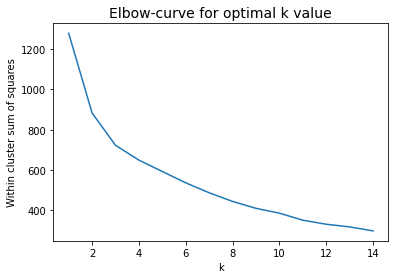

In [40]:
wss = pd.DataFrame(wss, columns = ['k', 'WSS'])

sns.lineplot(x = 'k', y = 'WSS', data = wss)
plt.ylabel('Within cluster sum of squares')
plt.title('Elbow-curve for optimal k value', fontsize = 14)
plt.show()

- At k=3, an elbow shape can be identified. The slope of the curve changes rapidly from k=3. Therefore, k=3 is selected as the optimum value for the number of clusters.

In [41]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_data_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country_data_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.27840755725793964
For n_clusters=3, the silhouette score is 0.2537720882615513
For n_clusters=4, the silhouette score is 0.2744719892517177
For n_clusters=5, the silhouette score is 0.23824177774470848
For n_clusters=6, the silhouette score is 0.2353000832146385
For n_clusters=7, the silhouette score is 0.20750438209352115
For n_clusters=8, the silhouette score is 0.18878627499031797


## **Model fitting - using the optimal k value**

In [42]:
kmodel_new = KMeans(n_clusters = 4)

kmodel_new.fit(country_data_scaled)
pred_labels = kmodel_new.predict(country_data_scaled)
# print(len(pred_labels))

In [43]:
# Adding the cluster labels column to the original data
country_data['k_cluster'] = pred_labels
country_data.reset_index(drop = True, inplace = True)
country_data.set_index('country', inplace = True)
display(country_data.head())

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_cluster
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


The cluster labels are predicted for each country in the scaled data.

# **Exploring the characteristics of each cluster**

In [44]:
display(country_data['k_cluster'].value_counts())

1    40
3    39
0    37
2    26
Name: k_cluster, dtype: int64

- Out of the 142 countries, almost 33% are in cluster 3.

### Child mortality and Fertility vs cluster

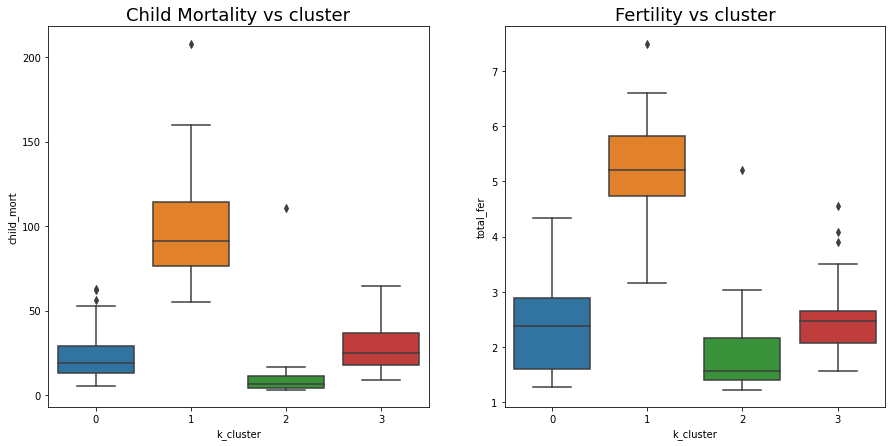

In [45]:
fig, ax = plt.subplots(1, 2, figsize = (15,7))

plt.subplot(1,2,1)
sns.boxplot(x = 'k_cluster', y = 'child_mort', data = country_data)
plt.title('Child Mortality vs cluster', fontsize = 18)

plt.subplot(1,2,2)
sns.boxplot(x = 'k_cluster', y = 'total_fer', data = country_data)
plt.title('Fertility vs cluster', fontsize = 18)
plt.show()

- Cluster 1 has countries with greater child mortality and fertility rates.
- Cluster 0 on the other hand has the lowest average of child mortality and tota fertility rates.

### Health expenditure and Life expectancy vs cluster

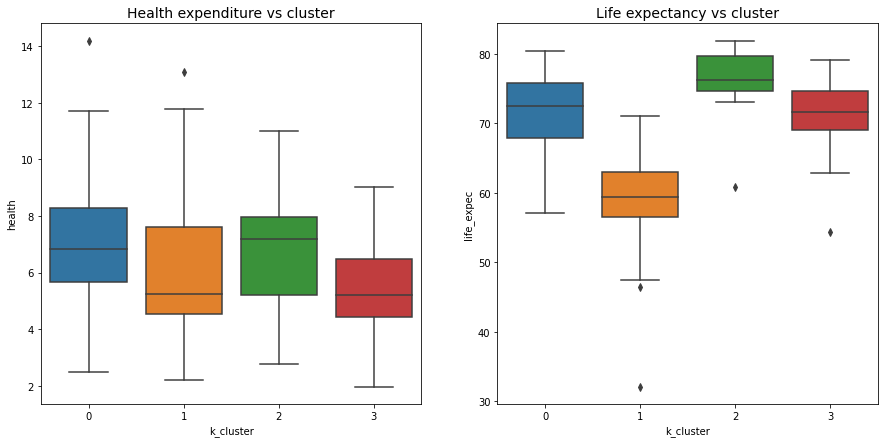

In [46]:
fig, ax = plt.subplots(1, 2, figsize = (15,7))

plt.subplot(1,2,1)
sns.boxplot(x = 'k_cluster', y = 'health', data = country_data)
plt.title('Health expenditure vs cluster', fontsize = 14)

plt.subplot(1,2,2)
sns.boxplot(x = 'k_cluster', y = 'life_expec', data = country_data)
plt.title('Life expectancy vs cluster', fontsize = 14)
plt.show()

- Health expenditure and life expectancy are the lowest in cluster 1.

### Exports and Imports vs cluster

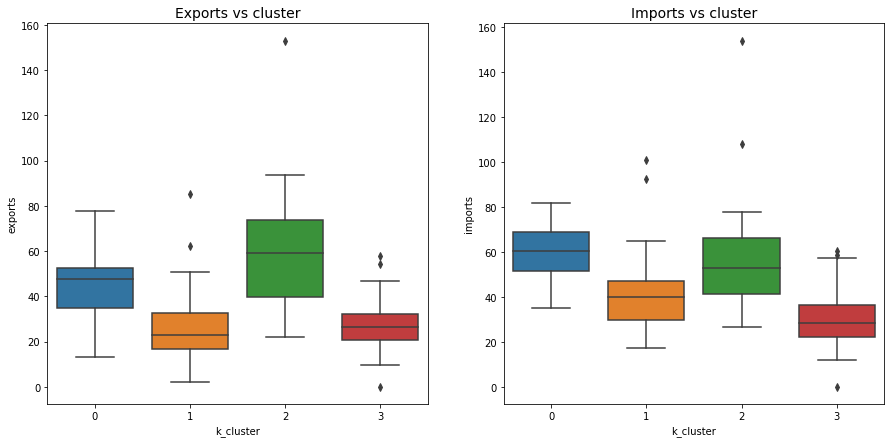

In [47]:
fig, ax = plt.subplots(1, 2, figsize = (15,7))

plt.subplot(1,2,1)
sns.boxplot(x = 'k_cluster', y = 'exports', data = country_data)
plt.title('Exports vs cluster', fontsize = 14)

plt.subplot(1,2,2)
sns.boxplot(x = 'k_cluster', y = 'imports', data = country_data)
plt.title('Imports vs cluster', fontsize = 14)
plt.show()

- Cluster 1 shows lower exports and imports in comparison to the rest of the clusters.

### GDP per capita, Net Income per person and Inflation vs cluster

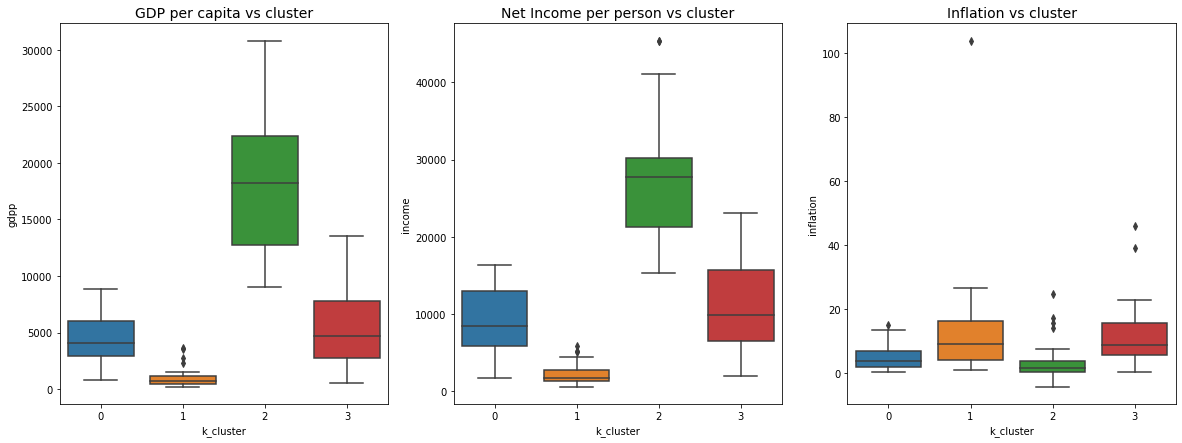

In [48]:
fig, ax = plt.subplots(1, 3, figsize = (20,7))

plt.subplot(1,3,1)
sns.boxplot(x = 'k_cluster', y = 'gdpp', data = country_data)
plt.title('GDP per capita vs cluster', fontsize = 14)

plt.subplot(1,3,2)
sns.boxplot(x = 'k_cluster', y = 'income', data = country_data)
plt.title('Net Income per person vs cluster', fontsize = 14)

plt.subplot(1,3,3)
sns.boxplot(x = 'k_cluster', y = 'inflation', data = country_data)
plt.title('Inflation vs cluster', fontsize = 14)
plt.show()

- Finally, the GDP per capita and Net Income per person ranks the lowest for cluster 1 while it leads in Inflation.

## HIERARCHICAL CLUSTERING

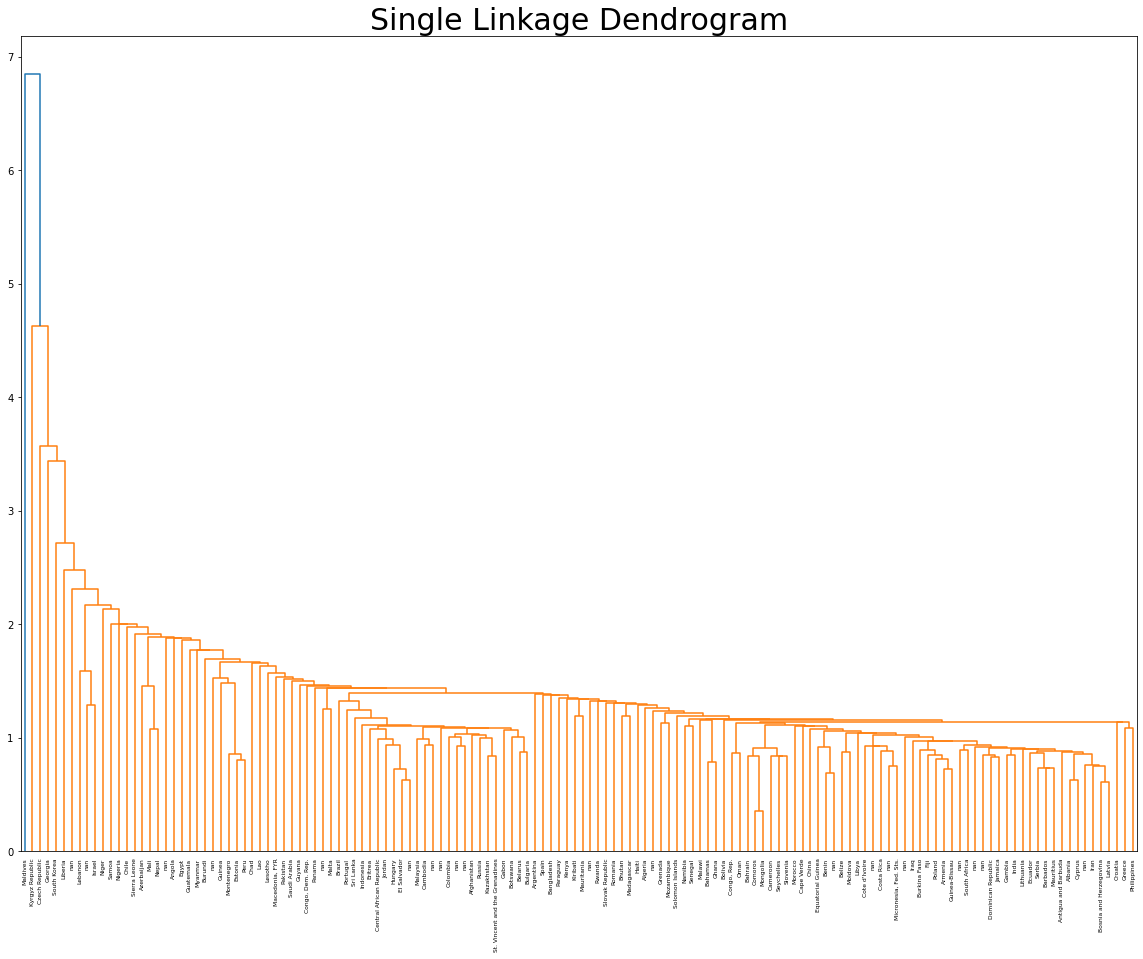

In [72]:
plt.figure(figsize=(20,15))
mergings_s = linkage(country_data_scaled, method = "single", metric='euclidean')
dendrogram(mergings_s, labels=country_data_scaled.index, leaf_rotation=90, leaf_font_size=6)
plt.title('Single Linkage Dendrogram', fontsize = 30)
plt.show()

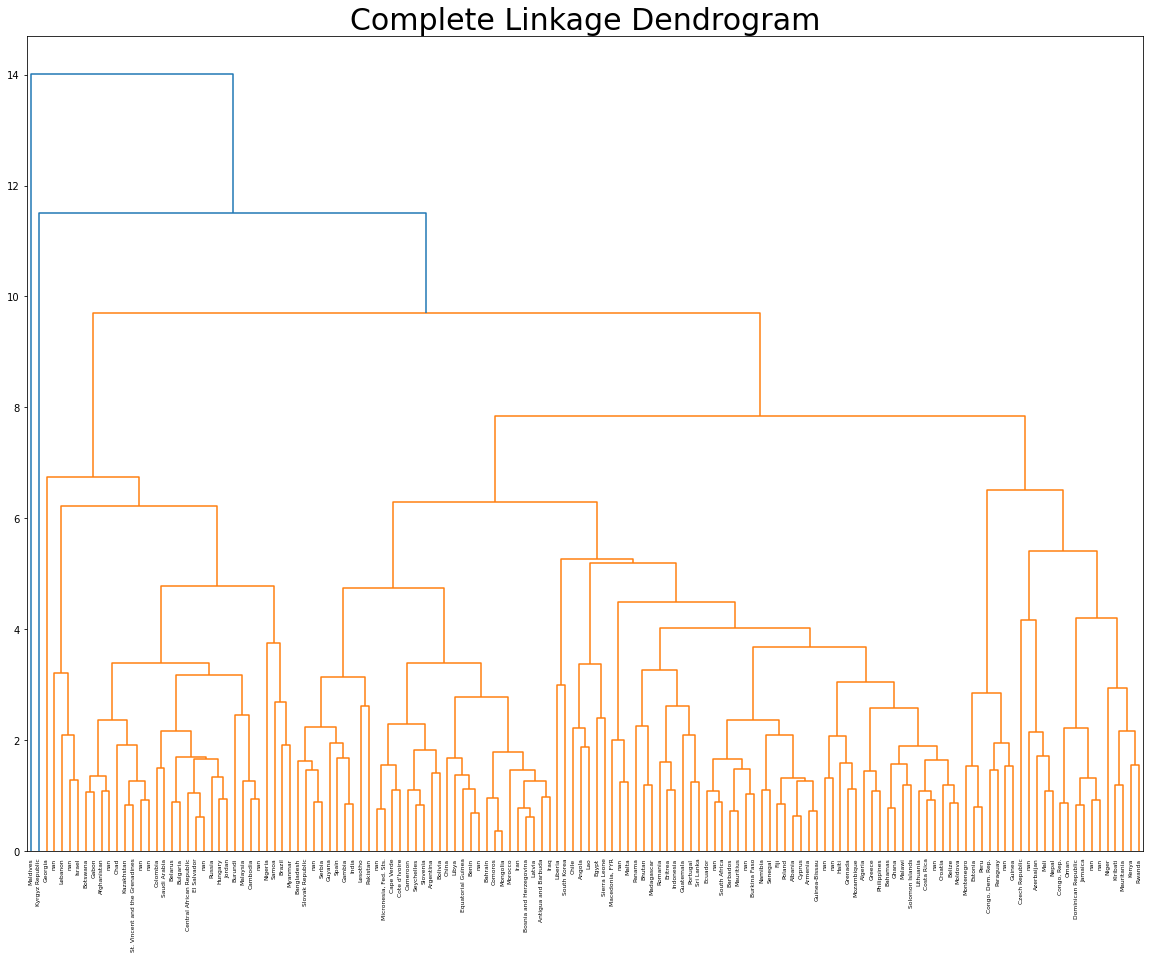

In [73]:
plt.figure(figsize=(20,15))
mergings_c = linkage(country_data_scaled, method = "complete", metric='euclidean')
dendrogram(mergings_c, labels=country_data_scaled.index, leaf_rotation=90, leaf_font_size=6)
plt.title('Complete Linkage Dendrogram', fontsize = 30)
plt.show()

In [51]:
H_cluster = cut_tree(mergings_c, n_clusters = 4)

In [52]:
country_data['h_cluster'] = H_cluster
country_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_cluster,h_cluster
country,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,1
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3,1
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,1


In [53]:
country_data['h_cluster'].value_counts()

1    108
0     32
2      1
3      1
Name: h_cluster, dtype: int64

In [54]:
ct = pd.crosstab(country_data['h_cluster'], country_data['k_cluster'])
print(ct)

k_cluster   0   1   2   3
h_cluster                
0           2  30   0   0
1          35   9  25  39
2           0   0   1   0
3           0   1   0   0


#### Effectively, K-means clustering has broken down many clusters of Hierarchical clustering into 2 sub-clusters
We will use the clusters formed by K-means for further analysis

### **Lets create a table which shows the mean values of all features for each cluster**

In [55]:
averages_of_all = pd.DataFrame(country_data.groupby('k_cluster').agg({'gdpp':'mean', 'income':'mean', 'inflation':'mean', 'exports':'mean', 'imports':'mean',\
                                     'health':'mean', 'child_mort':'mean', 'life_expec':'mean', 'total_fer':'mean'}))

display(averages_of_all.sort_values(by = ['child_mort', 'total_fer', 'health', 'life_expec', 'income'],\
                                    ascending = [False, False, True, True, True]))

,gdpp,income,inflation,exports,imports,health,child_mort,life_expec,total_fer
k_cluster,,,,,,,,,
1,992.300000,2200.075000,12.161875,26.347750,41.450000,6.213750,98.317500,59.002500,5.215500
3,5476.820513,10791.538462,11.488359,27.381769,31.176049,5.535385,29.007692,71.600000,2.523590
0,4350.162162,8945.675676,4.984676,46.156757,60.808108,7.278649,24.205405,71.159459,2.427297
2,18698.846154,27423.076923,3.930808,60.084615,57.430769,6.864231,11.707692,76.350000,1.935000


Therefore we can conclude that Cluster 1 is going to be the target group of countries who are require the financial aid.

- Cluster 1 -> Require financial aid
- Cluster 2 -> May require financial aid
- Cluster 3 -> May not require financial aid
- Cluster 0 -> Do not require financial aid

In [56]:
df_melt = pd.melt(country_data.reset_index(), id_vars = ['country','k_cluster'], var_name = 'Feature', value_name = 'Value')

In [61]:
df_melt.head()

,country,k_cluster,Feature,Value
0,Afghanistan,1,child_mort,90.2
1,Albania,0,child_mort,16.6
2,Algeria,3,child_mort,27.3
3,Angola,1,child_mort,119.0
4,Antigua and Barbuda,2,child_mort,10.3


In [63]:
clu0=df_melt.loc[df_melt['k_cluster']==1]
clu0_child_mort=clu0.loc[clu0['Feature']=='child_mort']
clu0_income=clu0.loc[clu0['Feature']=='income']
clu0_gdpp=clu0.loc[clu0['Feature']=='gdpp']

In [64]:
# Contries with highest child mortality rate which needs aid
clu0_child_mort.nlargest(15,'Value')

,country,k_cluster,Feature,Value
57,Haiti,1,child_mort,208.0
113,Sierra Leone,1,child_mort,160.0
27,Chad,1,child_mort,150.0
26,Central African Republic,1,child_mort,149.0
82,Mali,1,child_mort,137.0
96,Nigeria,1,child_mort,130.0
95,Niger,1,child_mort,123.0
3,Angola,1,child_mort,119.0
21,Burkina Faso,1,child_mort,116.0
32,"Congo, Dem. Rep.",1,child_mort,116.0


In [65]:
# Countries with less income which requires aid
clu0_income.nsmallest(15,'Value')

,country,k_cluster,Feature,Value
600,"Congo, Dem. Rep.",1,income,609.0
642,Liberia,1,income,700.0
590,Burundi,1,income,764.0
663,Niger,1,income,814.0
594,Central African Republic,1,income,888.0
659,Mozambique,1,income,918.0
647,Malawi,1,income,1030.0
622,Guinea,1,income,1190.0
696,Togo,1,income,1210.0
681,Sierra Leone,1,income,1220.0


In [66]:
# Countries with less Ggpp which requires aid
clu0_gdpp.nsmallest(15,'Value')

,country,k_cluster,Feature,Value
1158,Burundi,1,gdpp,231.0
1210,Liberia,1,gdpp,327.0
1168,"Congo, Dem. Rep.",1,gdpp,334.0
1231,Niger,1,gdpp,348.0
1249,Sierra Leone,1,gdpp,399.0
1214,Madagascar,1,gdpp,413.0
1227,Mozambique,1,gdpp,419.0
1162,Central African Republic,1,gdpp,446.0
1215,Malawi,1,gdpp,459.0
1180,Eritrea,1,gdpp,482.0


### We can clearly see that countries are common in each of these dataframe with respect to (child_mort, income and gdpp).
### Some of those countries are:
 1. Congo, Dem. Rep.
 2. Sierra Leone
 3. Niger
 4. Mozambique
 5. Guinea-Bissau
 6. Central African Republic
 7. Liberia

# **Conclusion**

- From the above visualization, we find majority of countries needing financial aid are concentrated in Central Africa. There are few countries in Asia and Middle East who also fall in this category.
- Majority of countries in Asia and South America may require a financial aid. However, certain Middle East countries like Oman, Saudi Arabia and some European nations do not require the financial help.
- There are other countries like United States of America, Australia, United Kingdom etc greyed out. This could be due to suppressing the outliers in the data.
- The **Exploratory Data Analysis** carried out has shown important insights and trends in the socio-economic factors.
- **Standardization** or normalization of the data has major effect in terms of the model performance. This step is important before feeding the data to the model.
- This problem statement required **Unsupervised Learning**, and for my analysis I considered only **KMeans Clustering** as the algorithm. Other clustering techniques like Hierarchical Clustering etc. can be used, which might give better accuracy.